In [1]:
#Data Visualisation and Manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import style
import seaborn as sns

In [2]:
#configure
#sets matplotlib to inline and displays graphs below the corresponding cell

%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [3]:
#Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [4]:
#preprocess
from keras.preprocessing.image import ImageDataGenerator

#dl libraries
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

In [5]:
# specifically for CNN
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [6]:
import tensorflow as tf
import random as rn

In [7]:
#specifically for manipulating zipped images and getting 
#numpy arrays of pixel values of images
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [8]:
x=[]
z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='Flowers/daisy'
FLOWER_SUNFLOWER_DIR='Flowers/sunflower'
FLOWER_TULIP_DIR='Flowers/tulip'
FLOWER_DANDI_DIR='Flowers/dandelion'
FLOWER_ROSE_DIR='Flowers/rose'

In [9]:
def assign_label(img,flower_type):
    return flower_type

In [10]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path=os.path.join(DIR,img)
        img=mpimg.imread(path)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        
        x.append(np.array(img))
        z.append(str(label))

In [11]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(x))

100%|███████████████████████████████████████████████████████████████████████████████| 769/769 [00:04<00:00, 155.93it/s]

769


In [12]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(x))

100%|███████████████████████████████████████████████████████████████████████████████| 734/734 [00:06<00:00, 119.15it/s]

1503


In [13]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(x))

100%|███████████████████████████████████████████████████████████████████████████████| 984/984 [00:07<00:00, 139.51it/s]

2487


In [14]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(x))

100%|█████████████████████████████████████████████████████████████████████████████| 1052/1052 [00:07<00:00, 150.06it/s]

3539


In [15]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(x))

100%|███████████████████████████████████████████████████████████████████████████████| 784/784 [00:05<00:00, 139.43it/s]

4323


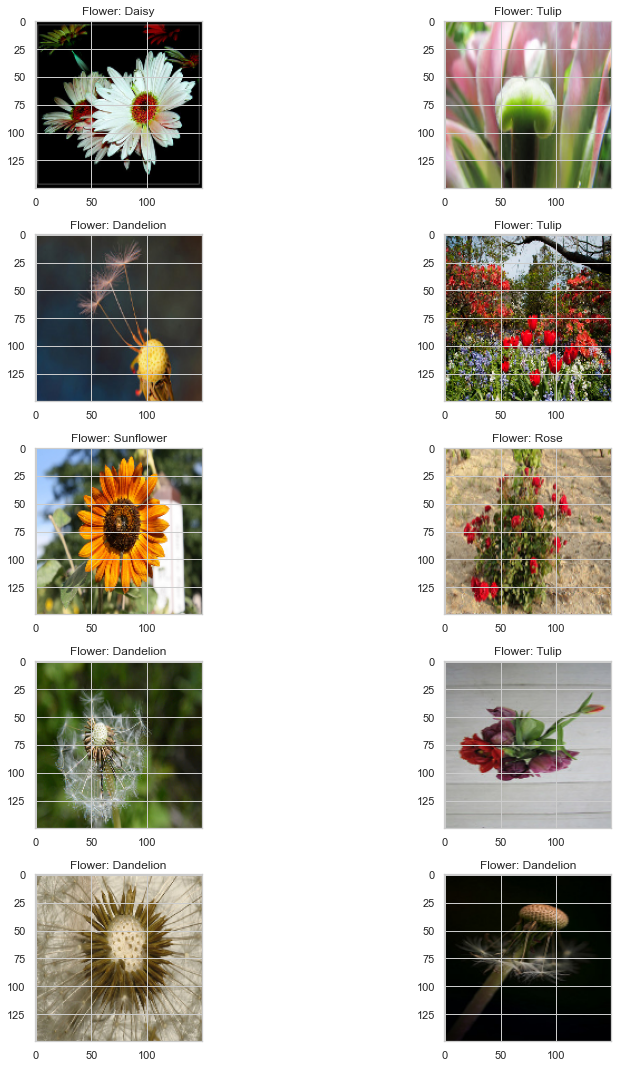

In [16]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        l=rn.randint(0,len(z))
        ax[i,j].imshow(x[l])
        ax[i,j].set_title('Flower: '+z[l])
    
plt.tight_layout()

In [17]:
le=LabelEncoder()
y=le.fit_transform(z)
y=to_categorical(y,5)
x=np.array(x)
x=x/255

In [18]:
print(type(y))
print(y)
#print(le.inverse_transform(y))

<class 'numpy.ndarray'>
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [20]:
np.random.seed(42)
rn.seed(42)
tf.compat.v1.set_random_seed(42)

In [21]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))


In [22]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr=ReduceLROnPlateau(monitor='vacl_acc',patience=3,verbose=1,factor=0.1)

In [23]:
datagen=ImageDataGenerator(rotation_range=10,
                          zoom_range=0.1,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          horizontal_flip=True,
                          vertical_flip=False)
datagen.fit(x_train)

In [24]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)        8

In [26]:
History=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                           epochs=epochs,validation_data=(x_test,y_test),verbose=1,
                           steps_per_epoch=x_train.shape[0]//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
25/25 [==============================] - 36s 1s/step - loss: 1.5084 - accuracy: 0.3221 - val_loss: 1.3705 - val_accuracy: 0.4089
Epoch 2/50
25/25 [==============================] - 35s 1s/step - loss: 1.2308 - accuracy: 0.4727 - val_loss: 1.1546 - val_accuracy: 0.5097
Epoch 3/50
25/25 [==============================] - 36s 1s/step - loss: 1.1077 - accuracy: 0.5559 - val_loss: 1.0691 - val_accuracy: 0.5846
Epoch 4/50
25/25 [==============================] - 37s 1s/step - loss: 1.0231 - accuracy: 0.5992 - val_loss: 0.9794 - val_accuracy: 0.6013
Epoch 5/50
25/25 [==============================] - 37s 1s/step - loss: 0.9709 - accuracy: 0.6220 - val_loss: 1.0288 - val_accuracy: 0.6004
Epoch 6/50
25/25 [==============================] - 37s 1s/step - loss: 0.9352 - accuracy: 0.6307 - val_loss: 0.8982 - val_accuracy: 0.6586
Epoch 7/50
25/25 [==============================] - 39s 2s/step - loss: 0.9016 - acc

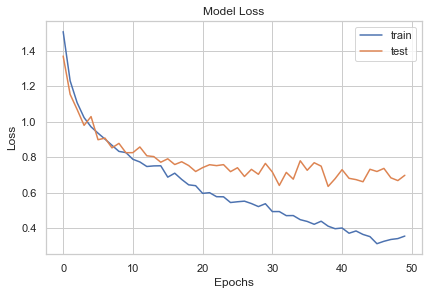

In [27]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

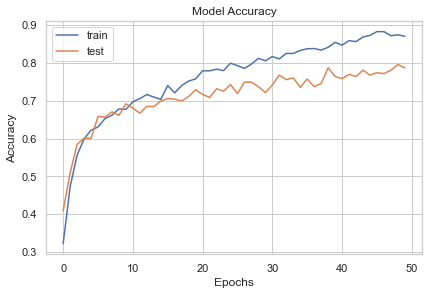

In [28]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [29]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [30]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

In [31]:
print(np.shape(y_test))
type(y_test)
print(le.inverse_transform([0, 1, 2, 3, 4]))
print(le.inverse_transform([0, 1, 0, 0, 0]))

(1081, 5)
['Daisy' 'Dandelion' 'Rose' 'Sunflower' 'Tulip']
['Daisy' 'Dandelion' 'Daisy' 'Daisy' 'Daisy']


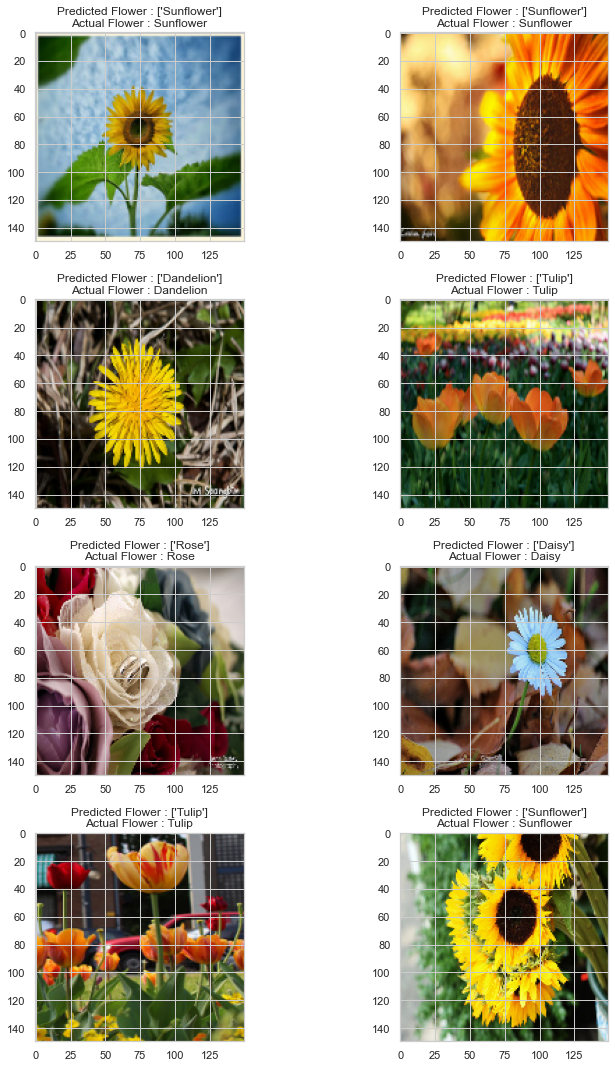

In [32]:
import warnings

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
cbr={0:'Daisy',1:'Dandelion',2:'Rose',3:'Sunflower',4:'Tulip'}
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        name=np.argmax([y_test[prop_class[count]]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+cbr[name])
        plt.tight_layout()
        count+=1

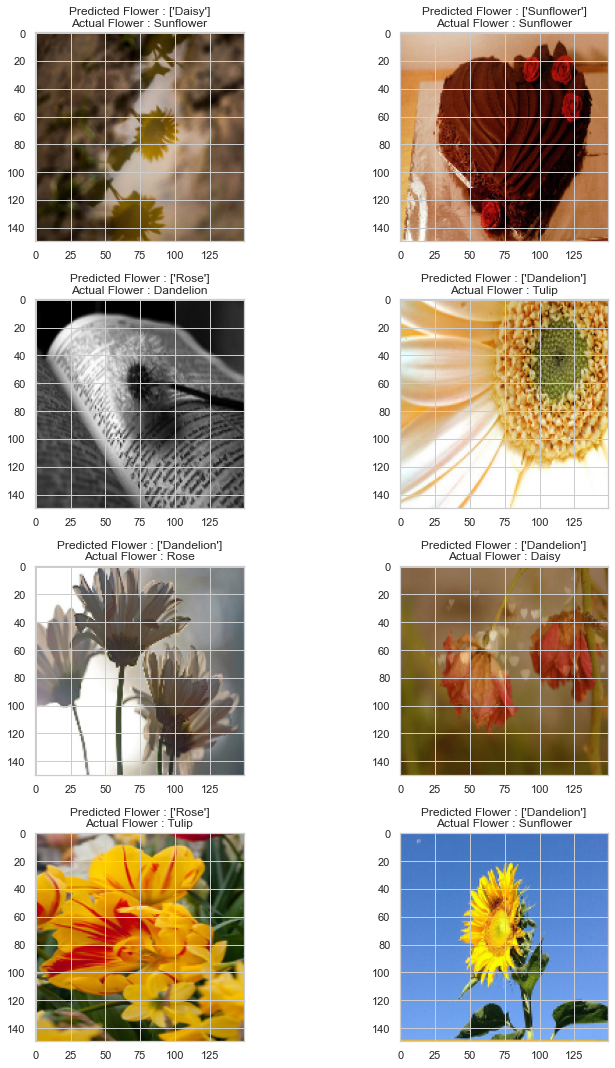

In [33]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
cbr={0:'Daisy',1:'Dandelion',2:'Rose',3:'Sunflower',4:'Tulip'}
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        name=np.argmax([y_test[prop_class[count]]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+cbr[name])
        plt.tight_layout()
        count+=1